### geopandas包在windows上安装比较麻烦，需要GDAL等一系列东西，如果是windows，建议使用conda来进行安装

### 如果是macos或者Linux，则相对简单

In [1]:
import geopandas 

In [2]:
gdf = geopandas.read_file("./data/Guerry.shp")

In [3]:
import pygeoda 

### 目前把geopandas的数据结构导入到geoda里面

In [4]:
guerry = pygeoda.geopandas_to_geoda(gdf)

### 定义空间权重矩阵为queen(共点共边即相邻）

In [5]:
queen_w = pygeoda.weights.queen(guerry) # create spatial weights

### 获得需要分析的数据列（用pandas的方法）

In [6]:
crm_prp = gdf.Crm_prs.to_list() # using data in geopandas df directly

### LISA分析

In [7]:
crm_lisa = pygeoda.local_moran(queen_w, crm_prp) # local moran

# 下面是可视化方法

In [10]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

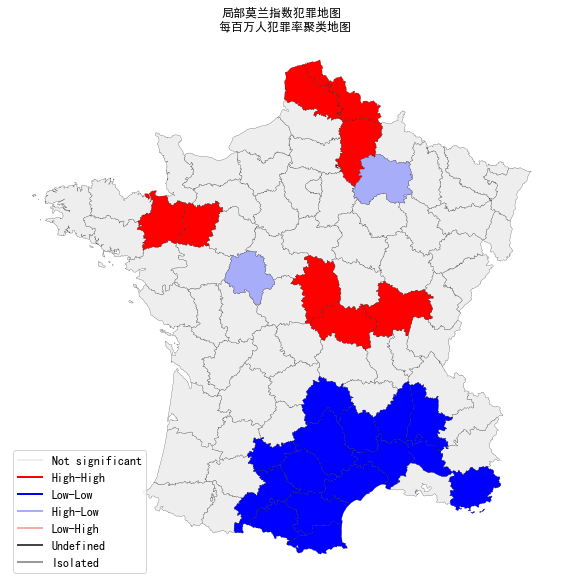

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = crm_lisa.GetColors()
lisa_labels = crm_lisa.GetLabels()

# attach LISA cluster indicators to geodataframe
gdf['LISA'] = crm_lisa.GetClusterIndicators()

for ctype, data in gdf.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='局部莫兰指数犯罪地图\n 每百万人犯罪率聚类地图')
ax.set_axis_off()